In [3]:
#2.3.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = r'C:\Users\curse\Documents\aieprog\aie-repository\homeworks\HW02\S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
print(data.head()) #Вывод первых 5 строк 
print(data.info()) #Информация о столбцах и типах
print(data.describe()) #Базовые описательные статистики

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [4]:
miss_count = {data.isnull().sum().sum()} #Доля пропусков в каждом столбце
print(miss_count)

dup_count = data.duplicated(keep=False) #Проверка на наличие полностью дублирующих строк 
print(dup_count)

#Проверка на странные данные в датасете

age_check = (data['age'] > 100) | (data['age'] < 0) #Проверка на возраст
print(data[age_check])

purchase_check = (data['purchases'] < 0) #Проверка на отрицательные покупки
print(data[purchase_check])

revenue_check = (data['revenue'] <= 0) & (data['purchases'] > 0) #Проверка на нулевую или отрицательную выручку при ненулевых продажах
print(data[revenue_check])

print(data[data.duplicated(keep=False)]) #Проверка на одинаковые данные


{np.int64(2)}
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


Найденные ошибки в датасете судя по полученным данным:
У пользователя под номером 5 нереалистичный возраст 120 лет, а также отрицательное количество продаж
У пользователя под номером 10 нулевой доход при ненулевых продажах, что невозможно
Пользователи 9 и 40 имеют одинаковые данные
У двух пользователей (4,878%) отсутствуют данные о их возрасте

In [15]:
age_counter = data['age'].value_counts()
print(age_counter)
country_counter = data['country'].value_counts()
print(country_counter)
revenue_by_country = data.groupby('country')['revenue'].sum()
print(revenue_by_country)
age_in_countries=data.groupby('country')['age'].sum()
print(age_in_countries)

age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64
country
CN     48.0
DE    173.0
FR    555.0
RU    391.0
US    257.0
Name: age, dtype: float64


В датасете чаще всего встречаются пользователи возрастом 24 года (5 человек), чуть менее часто встречаются пользователи от 28 до 52 лет
Подавляющее большинство пользователей - россияне (13 человек), далее французы (12 человек) и американцы (8 человек)
Пользователи из России доминируют по суммарной полученной выручке (10271), на каждого пользователя из России приходится средняя выручка 790
У пользователей из Китая наблюдается очень высокая выручка на человека, при всего двух занесенных в датасет пользователях (1054/чел.)

C:\Users\curse\AppData\Local\Temp\ipykernel_9308\838092438.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(


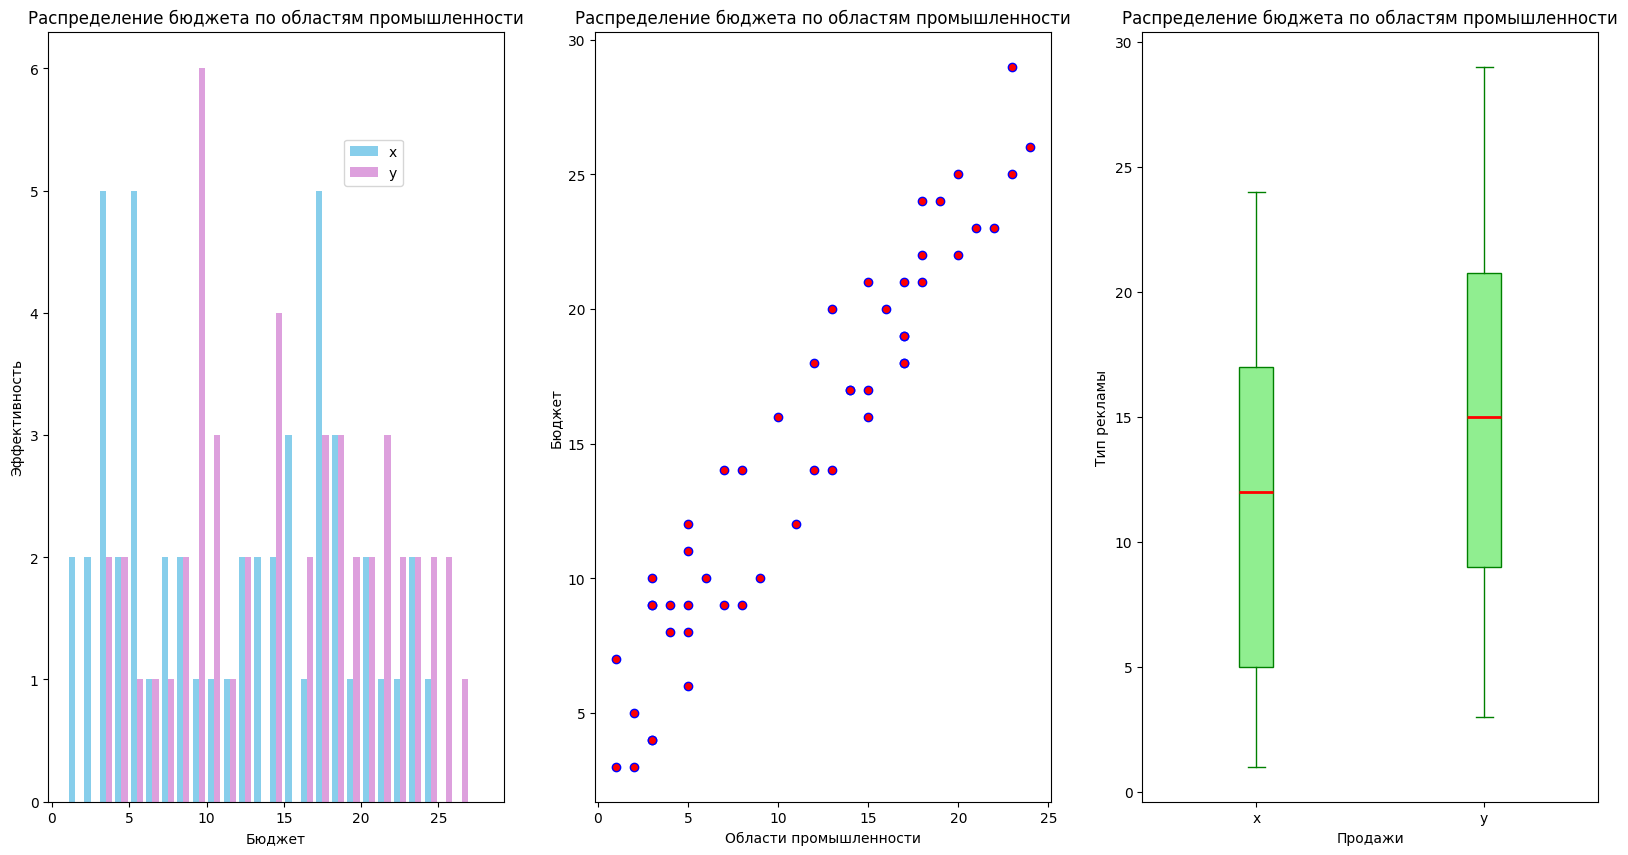

In [29]:
# Задаем случайные данные для x и шаг y 5
x = np.random.randint(low=1, high=25, size=50) #
y = x + np.random.randint(1, 8, size=x.size) #
data = np.column_stack((x, y)) #

fig, (ax2, ax1, ax3) = plt.subplots( #Делаем полотно с несколькими графиками
    nrows=1, ncols=3, # расположенными в один ряд два столбца
    figsize=(20, 10) # размер полотна
) #

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b') # строим первый график дискретного распределения
ax1.set_title('Распределение бюджета по областям промышленности') # название первого графика
ax1.set_xlabel('Области промышленности') # название горизонтальной оси первого графика, используем курсив
ax1.set_ylabel('Бюджет') # название вертикальной оси первого графика, используем курсив

ax2.hist( # строим второй график - гистограмму
    data, bins=np.arange(data.min(), data.max()),  # задаем данные и диапазоны
    color=['skyblue', 'plum'],
    label=('x', 'y') # и подписи данных
)
ax2.set_xlabel('Бюджет')
ax2.set_ylabel('Эффективность')
ax2.legend(loc=(0.65, 0.8)) # отображаем легенду и задаем ее расположение
ax2.set_title('Распределение бюджета по областям промышленности') # название второго графика

ax3.boxplot(
    data,                                        # данные (две колонки)
    patch_artist=True,                           # закрашиваем "ящики"
    labels=['x', 'y'],                           # подписи к данным
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green'),
    capprops=dict(color='green')
)
ax3.set_title('Распределение бюджета по областям промышленности')       # заголовок
ax3.set_xlabel('Продажи')                     # подпись оси X
ax3.set_ylabel('Тип рекламы')
plt.savefig(r'C:\Users\curse\Documents\aieprog\aie-repository\homeworks\HW02\figures\plots.png')
plt.show() # отображаем полотна